In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn

from torchvision import transforms
from torchvision import datasets
from torchvision.utils import make_grid, save_image

import numpy as np

In [2]:
from utils.model_io import load_parallel_state_dict

In [3]:
from models.simpleconv import SimpleConv

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
model = SimpleConv().to(device)
checkpoint = torch.load('./checkpoints/SimpleConv_082.pth.tar')
load_parallel_state_dict(model, checkpoint['state_dict'])

In [6]:
# get dataset
data = datasets.CIFAR10('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),]))

Files already downloaded and verified


In [7]:
classes = ('airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck',
          )

In [8]:
def get_certain_label(label):
    if isinstance(label, str):
        try:
            label = classes.index(label)
        except ValueError:
            print('Non Existing Label, just return None')
            return
    filtered = list(filter(lambda x: x[1] == label, data))
    # get just tensor
    return torch.stack(list(map(lambda x: x[0], filtered)), 0).to(device)

In [9]:
def draw_single_gridspec(images, row=3, col=3):
    fig = plt.figure(figsize=(4, 4))
    grid = plt.GridSpec(row, col, hspace=0.0, wspace=0.0)
    for r in range(row):
        for c in range(col):
            ax = fig.add_subplot(grid[r, c], xticklabels=[], yticklabels=[])
            ax.imshow(images[r * row + c].permute(1, 2, 0))
    
    plt.axis('off')
    plt.show()
    

In [10]:
from PIL import Image

In [11]:
# Let's use beautiful torchvision's function!
def save_and_show(origin, feature, **kwargs):
    save_image(origin, './origin.png', normalize=False, **kwargs)
    origin = Image.open('./origin.png')
    save_image(feature, './feature.png', normalize=True, **kwargs)
    feature = Image.open('./feature.png')
    
    fig = plt.figure(figsize=(6, 9))
    # feature
    ax1 = fig.add_subplot(121)
    ax1.imshow(feature)
    ax1.axis('off')
    
    # real
    ax2 = fig.add_subplot(122)
    ax2.imshow(origin)
    ax2.axis('off')

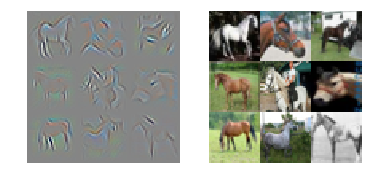

In [12]:
origin = get_certain_label('horse')[:9]
feature = model.deconvolution(origin, 2)
save_and_show(origin, feature, nrow=3, padding=0)

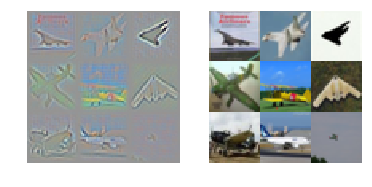

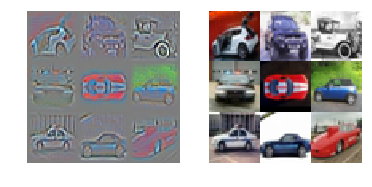

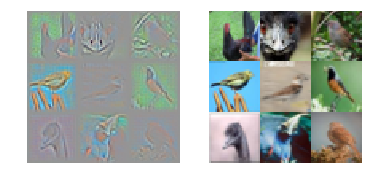

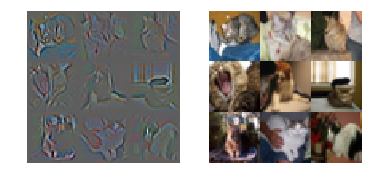

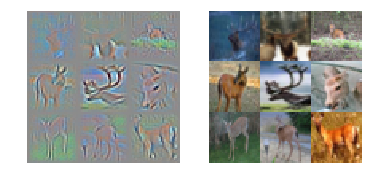

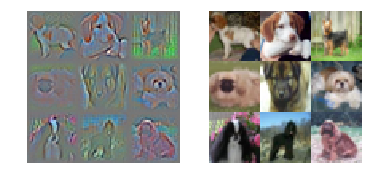

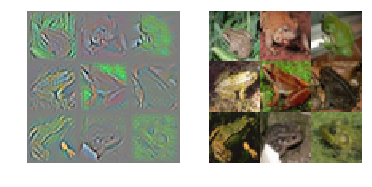

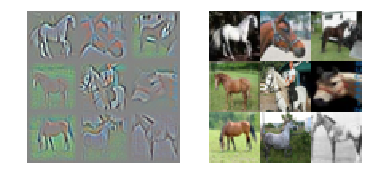

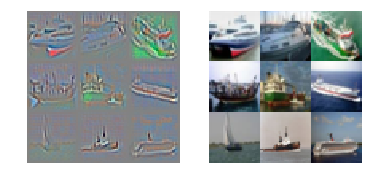

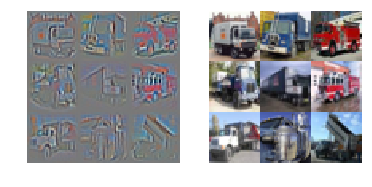

In [13]:
for cls in classes:
    origin = get_certain_label(cls)[:9]
    feature = model.deconvolution(origin, 1)
    save_and_show(origin, feature, nrow=3, padding=0)

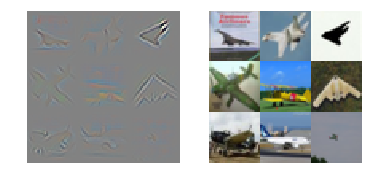

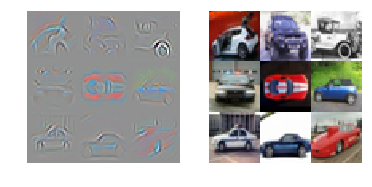

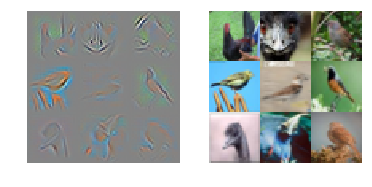

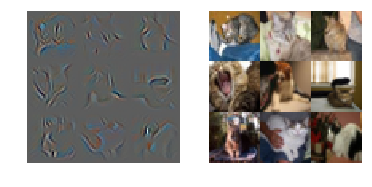

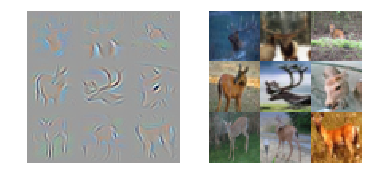

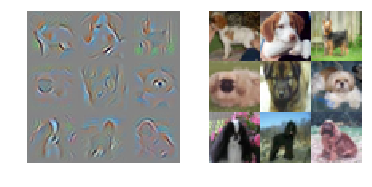

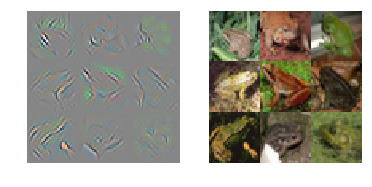

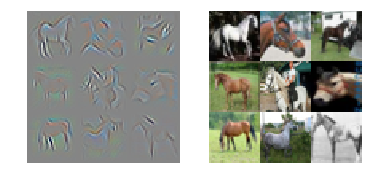

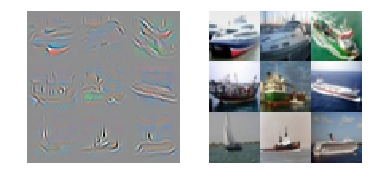

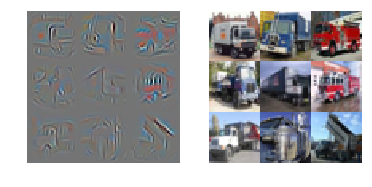

In [14]:
for cls in classes:
    origin = get_certain_label(cls)[:9]
    feature = model.deconvolution(origin, 2)
    save_and_show(origin, feature, nrow=3, padding=0)

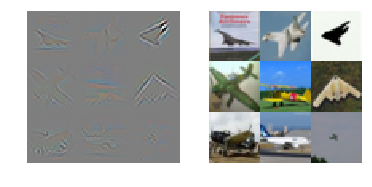

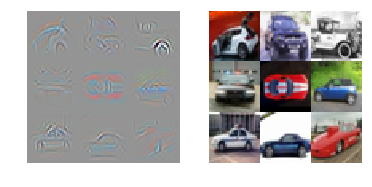

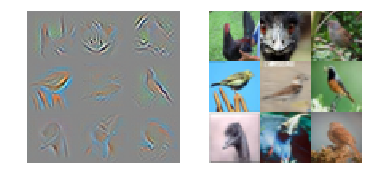

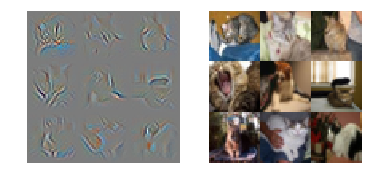

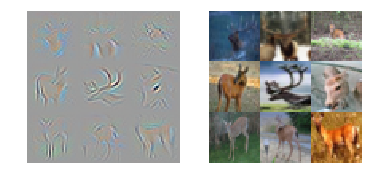

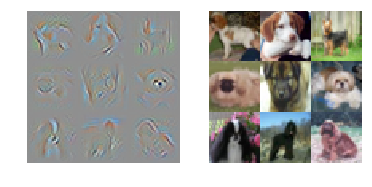

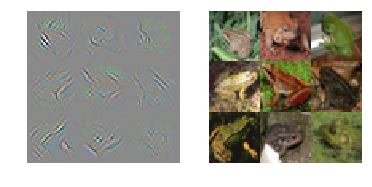

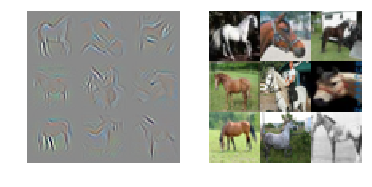

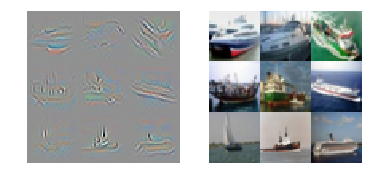

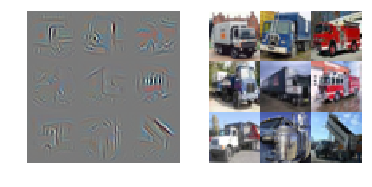

In [15]:
for cls in classes:
    origin = get_certain_label(cls)[:9]
    feature = model.deconvolution(origin, 3)
    save_and_show(origin, feature, nrow=3, padding=0)

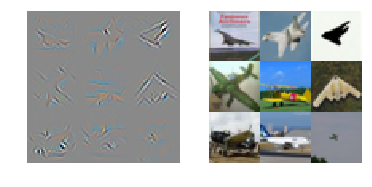

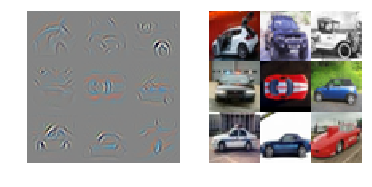

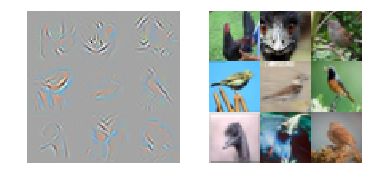

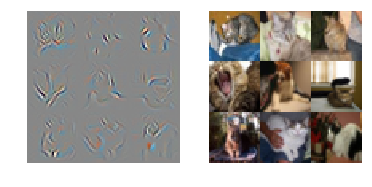

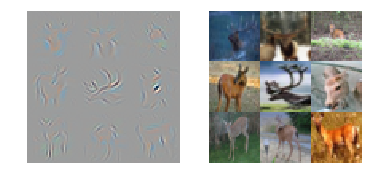

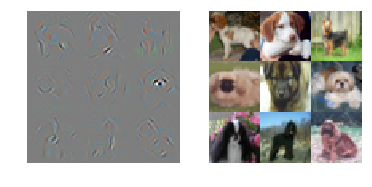

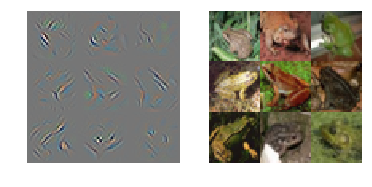

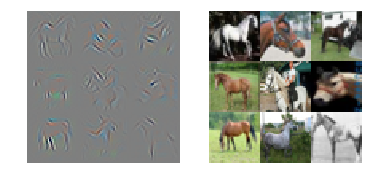

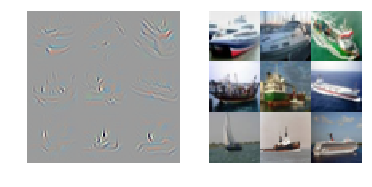

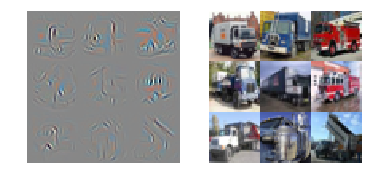

In [16]:
for cls in classes:
    origin = get_certain_label(cls)[:9]
    feature = model.deconvolution(origin, 4)
    save_and_show(origin, feature, nrow=3, padding=0)

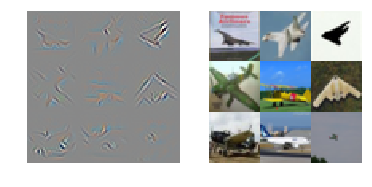

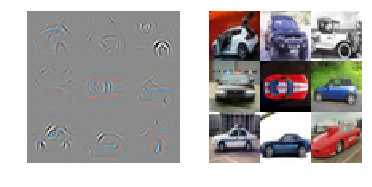

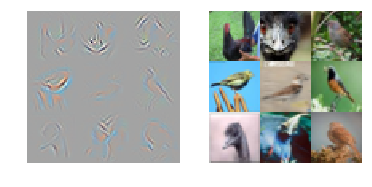

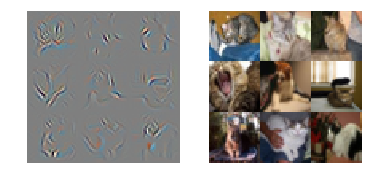

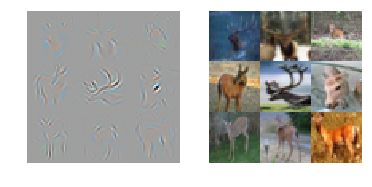

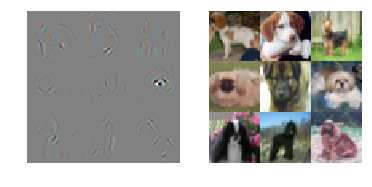

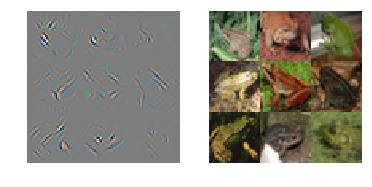

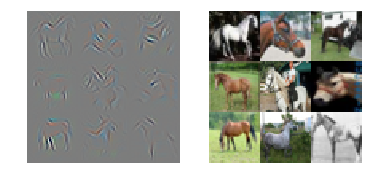

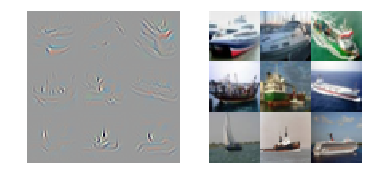

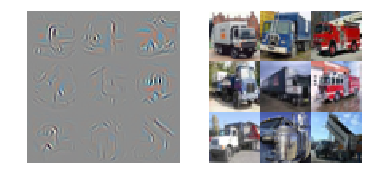

In [17]:
for cls in classes:
    origin = get_certain_label(cls)[:9]
    feature = model.deconvolution(origin, 5)
    save_and_show(origin, feature, nrow=3, padding=0)